# Minimization of one-variable functions
In-class demos from September 29, 2016.

In [1]:
using Plots


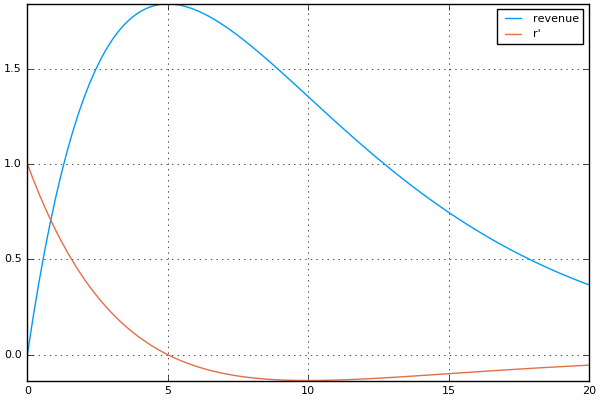

In [6]:
d = x-> exp(-0.2x)
r = x-> x*d(x)
plot(r, 0, 20, label="revenue")
plot!(rp, 0, 20, label="r'")


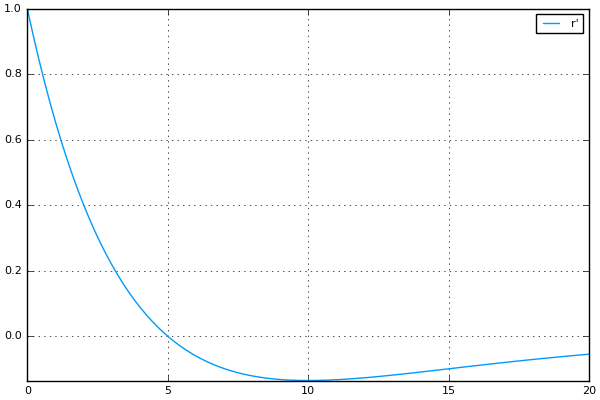

In [5]:
rp = x-> (1-0.2x)*d(x)
plot(rp, 0, 20, label="r'")

In [7]:
rpp = x-> -0.2d(x)*(2-0.2x)
rpp(5)

-0.07357588823428847

In [8]:
rp(5)

0.0

In [9]:
function newton(f, fp, x; atol=1e-6, verbose=false)
    err = Inf
    verbose && @printf "%3s:  %10s\n"  "k" "err"
    for k=0:1000
        xnew = x - f(x)/fp(x)
        err = abs(x-xnew)
        verbose && @printf "%3i:  %10.2e\n"  k err
        err < atol && break
        x = xnew
    end 
    return x
end;

In [10]:
newton(rp, rpp, 0, verbose=true)

  k:         err
  0:    2.50e+00
  1:    1.67e+00
  2:    7.14e-01
  3:    1.16e-01
  4:    2.77e-03
  5:    1.53e-06
  6:    4.70e-13


4.99999999999953

In [11]:
function bisect(f, a, b; atol=1e-6, ftol=1e-12, maxIts=1e6, verbose=false)
    fa, fb = f(a), f(b)
    if (a ≥ b) || (fa*fb ≥ 0)
        error("Incorrect inputs!")
    end
    verbose && @printf "%4s: %15s  %15s  %10s  %10s  %10s  %10s\n" "n" "a" "b" "fa" "fb" "fp" "|b-a|"
    for k in 0:maxIts
        p = (a+b)/2
        fpOld = fp = f(p)
        if fa*fp < 0
            b, fb = p, fp
        else
            a, fa = p, fp
        end
        verbose && @printf "%4i: %15.5e  %15.5e  %10.2e  %10.2e  %10.2e  %10.2e\n" k a  b fa fb fpOld abs(b-a)
        abs(fp)  < ftol && return p
        abs(b-a) ≤ atol && return p
    end
end;

In [13]:
bisect(rp, 0, 11, verbose=true)

   n:               a                b          fa          fb          fp       |b-a|
   0:     0.00000e+00      5.50000e+00    1.00e+00   -3.33e-02   -3.33e-02    5.50e+00
   1:     2.75000e+00      5.50000e+00    2.60e-01   -3.33e-02    2.60e-01    2.75e+00
   2:     4.12500e+00      5.50000e+00    7.67e-02   -3.33e-02    7.67e-02    1.38e+00
   3:     4.81250e+00      5.50000e+00    1.43e-02   -3.33e-02    1.43e-02    6.88e-01
   4:     4.81250e+00      5.15625e+00    1.43e-02   -1.11e-02   -1.11e-02    3.44e-01
   5:     4.98438e+00      5.15625e+00    1.15e-03   -1.11e-02    1.15e-03    1.72e-01
   6:     4.98438e+00      5.07031e+00    1.15e-03   -5.10e-03   -5.10e-03    8.59e-02
   7:     4.98438e+00      5.02734e+00    1.15e-03   -2.00e-03   -2.00e-03    4.30e-02
   8:     4.98438e+00      5.00586e+00    1.15e-03   -4.31e-04   -4.31e-04    2.15e-02
   9:     4.99512e+00      5.00586e+00    3.60e-04   -4.31e-04    3.60e-04    1.07e-02
  10:     4.99512e+00      5.00049e+00    3

4.999999821186066